# Project: Investigate a Dataset (TMDb movie data)

***Introduction
This data set contains information about 5000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The following questions will be answered with the data:***

## Table of Contents

- [Introduction](#Introduction)

- [Data Wrangling](#Data-Wrangling)

- [DataCleaning](#Data-Cleaning)

- [Exploratory Data Analysis](#Exploratory_Data_Analysis)

- [Conclusions](#Conclusions)

# Introduction


This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue. The following questions will be answered with the data:

## Questions


<dt> What is the average user rating for all the movies? </dt>
<dt>What is the average number of movies per year?</dt>
<dt>What is the average revenue per year?</dt> 
<dt>What kinds of properties are associated with movies that have high revenues?</dt>
<dt>Which genres are most popular from year to year?</dt>

In [23]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Wrangling

General Properties

In [24]:
#load the data and view the first five rows
df = pd.read_csv('tmdb_5000_movies.csv')

In [25]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [26]:
#view the general information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

##### We have 4803 rows and 20 columns.

##### The following cleaning will be performed: remove extraneous columns, remove null values and remove duplicate rows.

# Data Cleaning
Delete extraneous columns

In [27]:
#delete extraneous columns
df_8=df.drop(['budget','revenue','id','homepage','tagline','keywords'], axis=1)
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4803 non-null   object 
 1   original_language     4803 non-null   object 
 2   original_title        4803 non-null   object 
 3   overview              4800 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   runtime               4801 non-null   float64
 9   spoken_languages      4803 non-null   object 
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 525.5+ KB


In [28]:
#check for duplicate rows
df_8.duplicated().sum()

0

**We  dont have any duplicated row.**

In [29]:
#view for other null values for each column
df_8.isnull().sum()

genres                  0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [54]:
#to fill any missing values 
df_8.fillna('null', inplace=True)
df_8.isnull().sum().sum()

0

In [31]:
#check the total count of miss
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                4803 non-null   object 
 1   original_language     4803 non-null   object 
 2   original_title        4803 non-null   object 
 3   overview              4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4803 non-null   object 
 8   runtime               4803 non-null   object 
 9   spoken_languages      4803 non-null   object 
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 525.5+ KB


lastly lets rename genres to  Types

In [32]:
#change the name of column geners to Types
df_8.rename({'genres':'Types'}, axis=1, inplace=True)

In [33]:
#check cahnges that i make it to column geners if it is change or not
df_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Types                 4803 non-null   object 
 1   original_language     4803 non-null   object 
 2   original_title        4803 non-null   object 
 3   overview              4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4803 non-null   object 
 8   runtime               4803 non-null   object 
 9   spoken_languages      4803 non-null   object 
 10  status                4803 non-null   object 
 11  title                 4803 non-null   object 
 12  vote_average          4803 non-null   float64
 13  vote_count            4803 non-null   int64  
dtypes: float64(2), int64(1), object(11)
memory usage: 525.5+ KB


# Exploratory Data Analysis<dt> What is the average user rating for all the movies? </dt>
Statistical summary of numeric features


In [34]:
df_8.describe()

,popularity,vote_average,vote_count
count,4803.000000,4803.000000,4803.000000
mean,21.492301,6.092172,690.217989
std,31.816650,1.194612,1234.585891
min,0.000000,0.000000,0.000000
25%,4.668070,5.600000,54.000000
50%,12.921594,6.200000,235.000000
75%,28.313505,6.800000,737.000000
max,875.581305,10.000000,13752.000000


In [35]:
df_8[df_8['runtime']==0]

,Types,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,vote_average,vote_count
1011,"[{""id"": 27, ""name"": ""Horror""}]",de,The Tooth Fairy,A woman and her daughter (Nicole Muñoz) encoun...,0.716764,[],[],2006-08-08,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The Tooth Fairy,4.3,13
3112,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",en,Blood Done Sign My Name,A drama based on the true story in which a bla...,0.397341,[],[],2010-02-01,0.0,[],Released,Blood Done Sign My Name,6.0,5
3669,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Should've Been Romeo,0.0,0
3809,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,How to Fall in Love,"An accountant, who never quite grew out of his...",1.923514,"[{""name"": ""Annuit Coeptis Entertainment Inc."",...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-21,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,How to Fall in Love,5.2,20
3953,"[{""id"": 10752, ""name"": ""War""}, {""id"": 18, ""nam...",en,Fort McCoy,Unable to serve in World War II because of a h...,0.384496,[],[],2014-01-01,0.0,[],Released,Fort McCoy,6.3,2
3992,[],en,Sardaarji,A ghost hunter uses bottles to capture trouble...,0.296981,[],"[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2015-06-26,0.0,[],Released,Sardaarji,9.5,2
4068,[],en,Sharkskin,The Post War II story of Manhattan born Mike E...,0.027801,[],[],2015-01-01,0.0,[],Released,Sharkskin,0.0,0
4118,[],en,Hum To Mohabbat Karega,"Raju, a waiter, is in love with the famous TV ...",0.001186,[],[],2000-05-26,0.0,[],Released,Hum To Mohabbat Karega,0.0,0
4205,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",en,N-Secure,N-Secure is a no holds-barred thrilling drama ...,0.134560,[],[],2010-10-15,0.0,[],Released,N-Secure,4.3,4
4210,"[{""id"": 10749, ""name"": ""Romance""}]",hi,दिल जो भी कहे,"During the British rule in India, several Indi...",0.122704,"[{""name"": ""Entertainment One Pvt. Ltd."", ""id"":...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",2006-12-07,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Dil Jo Bhi Kahey...,0.0,0


 there are some strange numbers here, how can a movie runtime be 0.  let's check it

In [36]:
df_8.query('runtime==0').count()

Types                   35
original_language       35
original_title          35
overview                35
popularity              35
production_companies    35
production_countries    35
release_date            35
runtime                 35
spoken_languages        35
status                  35
title                   35
vote_average            35
vote_count              35
dtype: int64

***so the above movies has zero runtime and zero vote average and zero vote count, i will just drop them out ( although their title indicates that zero is wrong entery)***

In [37]:
df_8.drop(df_8[df_8.runtime==0].index, inplace=True)
df_8.query('runtime==0').count().sum()

0

In [38]:
df_8.describe()

,popularity,vote_average,vote_count
count,4768.000000,4768.000000,4768.000000
mean,21.647404,6.112332,695.261745
std,31.881465,1.147306,1237.700008
min,0.000372,0.000000,0.000000
25%,4.838697,5.600000,56.000000
50%,13.149014,6.200000,239.000000
75%,28.532272,6.800000,742.000000
max,875.581305,10.000000,13752.000000


The min of vote_average and vote_count columns are zero ! lets check it

In [39]:
# checking the percentage of zero valued vote_average
(df_8['vote_average']<=0).sum()/(df_8['vote_average'].count())*100

1.0696308724832215

Checking for numbers of rows that has either zero vote_average or zero vote_count as a percentage of all the data

In [40]:
(((df_8['vote_average']<=0)|(df_8['vote_count']<=0)).sum())/(df_8.vote_average.count())*100

1.0696308724832215

Around of 1 % of the data has either zero or wrong vote average calculations!!!, that should be noted and mentioned in the conclusion

lets have some hist, scatter figures all at once

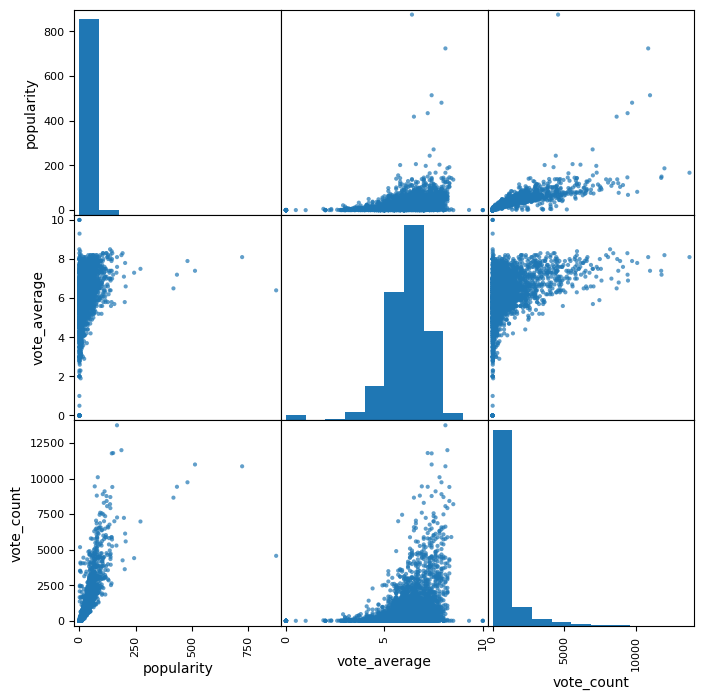

In [41]:
pd.plotting.scatter_matrix(df_8,alpha = 0.7, figsize= (8,8), grid=True );

from the above figures, some data can be concluded at glance, like :

 there is pretty direct relation vote count and vote average.
 also between the popularity and vote count and average (Positive relationship) 

### Research Question 1 (What is the most popular gener and what is the most profitable ??)
the problem is every movie has multiple Types, i may need to split this column and then explode!

first i will define df2 as df_8 then i will split genre column and finally explode, this will increase the number of rows dramatically, but i think it the best course of action to apply group by to types column

In [42]:
df2 = df_8

In [43]:
df2=df2.assign(Types=df2.Types.str.split('|')).explode('Types')
df2.head()

,Types,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


After splitting, and exploding i will do a group by title for total popularity and sort by average

In [49]:
df_title_popularity=df2.groupby(['title'],as_index=False)['popularity'].mean().sort_values(by=['popularity'])
df_title_popularity

,title,popularity
214,Alien Zone,0.000372
2602,Penitentiary,0.001117
2251,Midnight Cabaret,0.001389
2109,Love Letters,0.001586
1047,Down & Out With The Dolls,0.002386
...,...,...
2136,Mad Max: Fury Road,434.278564
1515,Guardians of the Galaxy,481.098624
941,Deadpool,514.569956
1812,Interstellar,724.247784


Plotting with bars horizontally can elaborate more

In [50]:
x1=df_title_popularity['title']
y1=df_title_popularity['popularity']

here I will specify only the top 10 titles 

Text(0.5, 0, 'popularity')

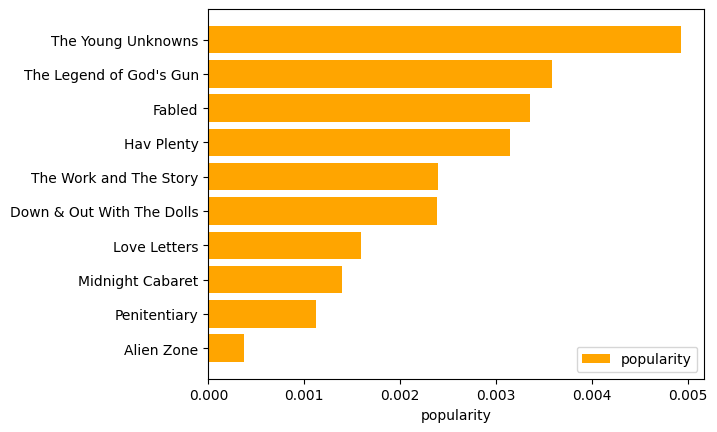

In [53]:
plt.barh(x1[:10],y1[:10],color="orange",label='popularity')
plt.legend()
plt.xlabel('popularity')

 what is the average of user rating?

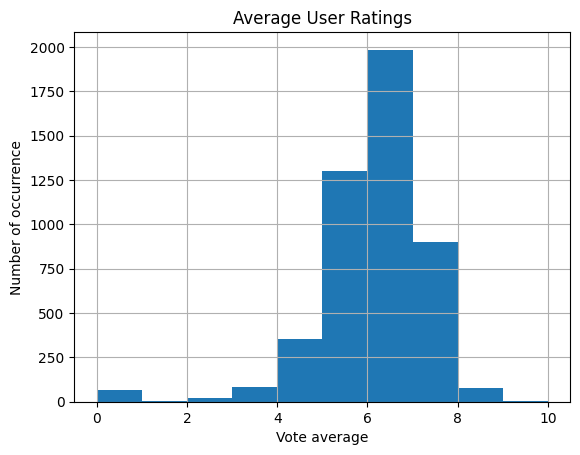

In [78]:
df['vote_average'].hist()
plt.title('Average User Ratings')
plt.xlabel('Vote average')
plt.ylabel('Number of movies');

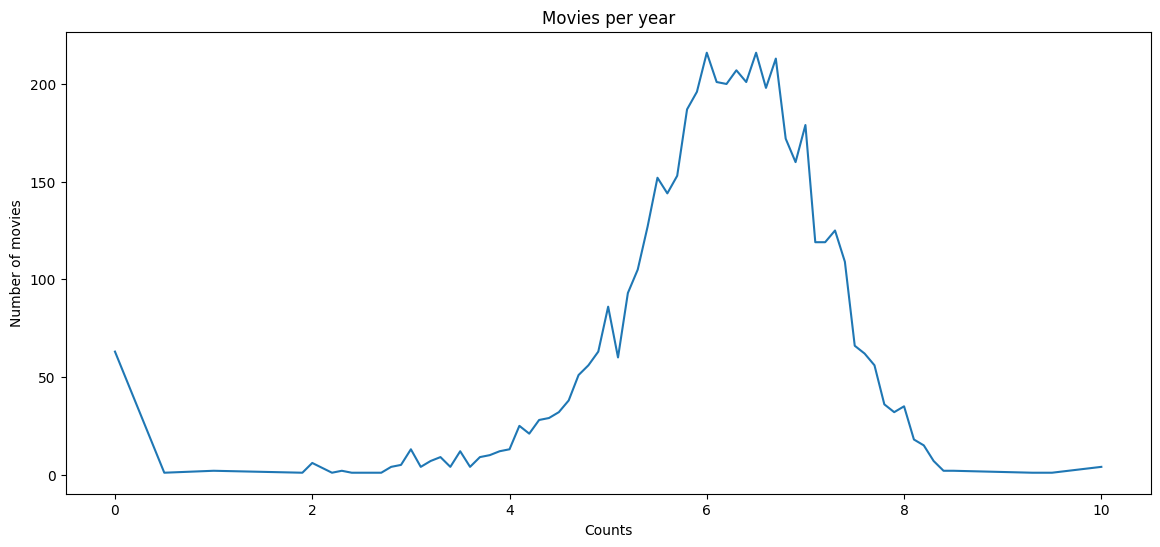

In [86]:
#Number of movies per year
df['vote_average'].value_counts().sort_index().plot(figsize=(14,6), kind='line')
plt.title('Movies per year')
plt.xlabel('Counts')
plt.ylabel('Number of movies');

The number of movies produced have been increasing over time. The highest number of movies were produced in 2011.

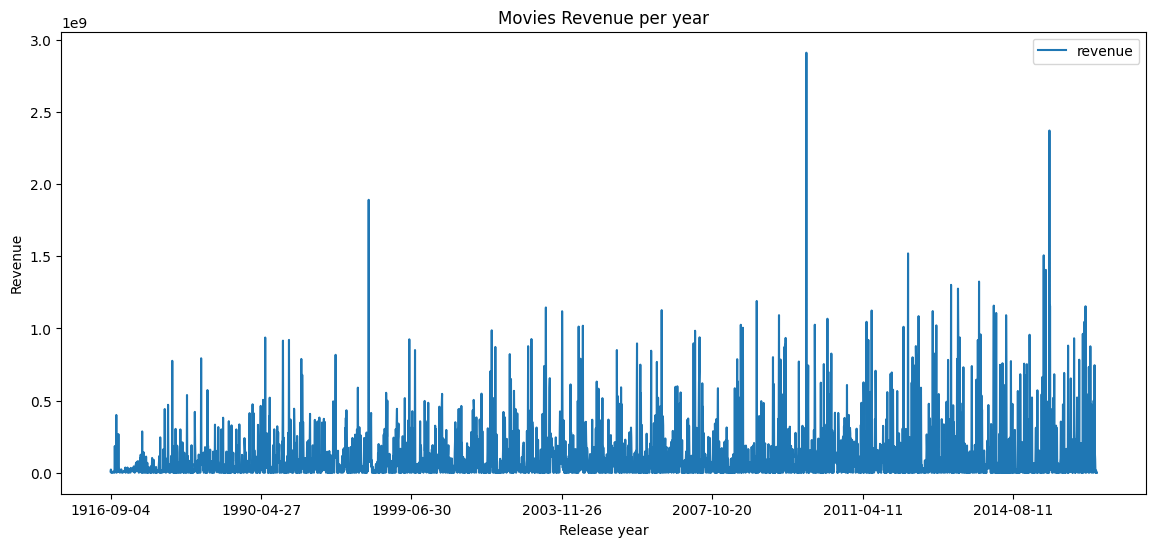

In [90]:
#revenue per year
df.groupby('release_date').sum()[['revenue']].plot(figsize=(14,6), kind='line')
plt.title('Movies Revenue per year')
plt.xlabel('Release year')
plt.ylabel('Revenue');

The revenues generated from the movies have been increasing over time. The highest revenue was generated between 2007 -2011.

### What kinds of properties are associated with movies that have high revenues?

Plot of three scatter diagrams to see the relationship between revenue and three properties in the data: popularity, runtime and vote average

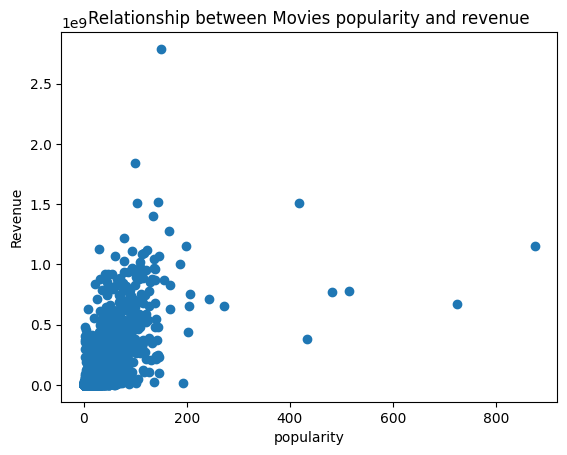

In [93]:
#create a funtion to plot the relationship between revenue and other variables
def to_chart(var):
    plt.scatter(x=df[var], y=df['revenue'])
    plt.title('Relationship between Movies {} and revenue'.format(var))
    plt.xlabel(var)
    plt.ylabel('Revenue');

#Movies popularity Vs Revenue scatterplot
to_chart('popularity')

Movies' Popularity seems to be more positively correlated with revenue compared to other properties of the data. Movies with more popularity seems to generate higher revenue. More research needs to be done on the most important properties associated with high revenue.

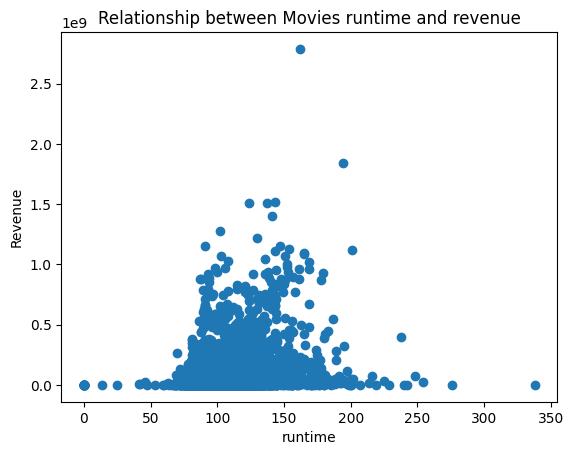

In [94]:
#Movies runtime Vs Revenue scatterplot

to_chart('runtime')

There is weak correlation between runtime and revenue

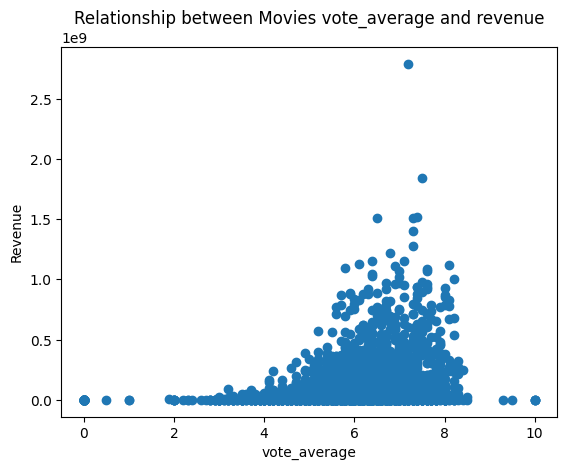

In [95]:
#Vote average Vs Revenue scatterplot

to_chart('vote_average')

There is weak correlation between vote average and revenue

### Which genres are most popular from year to year?


Text(0, 0.5, 'Genres')

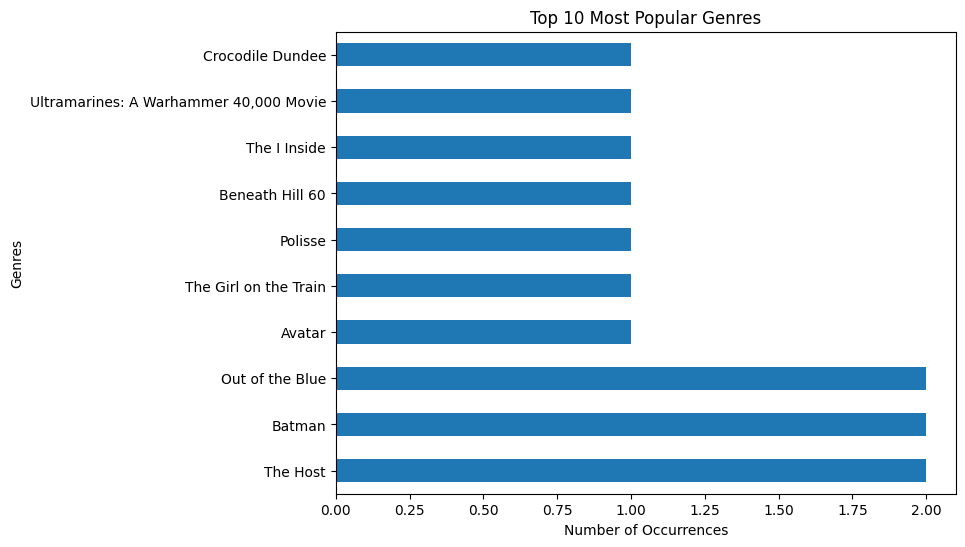

In [59]:
title_div = df['title'].str.split("|")
title_combined = []

for tit in title_div:
    title_combined.extend(tit)

genre_counts = pd.Series(title_combined).value_counts()

top_10_genres = genre_counts[:10]  # Selecting top 10 genres

top_10_genres.plot(figsize=(8, 6), kind="barh")
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genres')

The top 3 are batman , the host and out of the blue

## Conclusions
This data set contains information about 4 movies. Data cleaning like removing extraneous columns, deleting null values and deleting duplicates were performed in order to enable accurate analysis. Exploratory data analysis was also carried out to arrive at the following findings:

Findings

The vote average for the movies is 6.16. This indicates the average users' ratings for all the movies.
The number of movies produced and the revenue generated have been increasing over time. The highest number of movies were produced in 2011 while the highest revenue was generated in 2015.
Movies' Popularity seems to be more positively correlated with revenue. Movies with more popularity seems to generate higher revenue. More research needs to be done on the most important properties associated with high revenue.
The top five genres are Drama, Comedy, Thriller, action and adventure.
Limitations
Nonetheless, these findings must be interpreted with caution and a number of limitations should be borne in mind:

The findings were made based on descriptive statistics.
Additional research need to be peformed to understand why some movies generated zero revenue because the removal of the rows with zero revenue reduced the data shape.